In [236]:
#Librerías necesarias

import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import emoji

In [237]:
#Directorio de trabajo
os.chdir('C:/Users/claud/Documents/GitHub/dataviz_varios/riverplate/')

In [238]:
#obtener tuits que contengan el hashtag #MuñecoEterno


tweets_list = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#MuñecoEterno').get_items()):
    if i>=10000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [239]:
#Crear dataframe
tweets_df = pd.DataFrame(tweets_list, columns=['datetime', 'id', 'text', 'username'])
tweets_df

,datetime,id,text,username
0,2022-10-14 11:21:51+00:00,1580881568523878400,5 clasificaciones les kgamos.\n#MuñecoEterno h...,BrizuPablo
1,2022-10-14 11:14:11+00:00,1580879638725033985,Enorme. De los más grandes de nuestra historia...,fedelomlom
2,2022-10-14 10:57:09+00:00,1580875351231967233,📍 River Camp: escenas de un amor para toda la ...,IdentidadRiver1
3,2022-10-14 10:50:12+00:00,1580873603335061504,#Bomba El hombre identificado con Boca explicó...,cronica
4,2022-10-14 10:50:12+00:00,1580873602986934273,#Bomba El hombre identificado con Boca explicó...,CronicaTV
...,...,...,...,...
749,2014-12-11 03:51:19+00:00,542889340893163520,#RiverCampeón #SEMI-raYNoSeToca #MuñecoEterno ...,VicoRiver
750,2014-08-11 21:10:44+00:00,498939596990709761,No quiero leerlo ;;__;; #MuñecoEterno LOL xD,0yasuriyamileth
751,2014-07-03 15:40:49+00:00,484723444303790080,Fiesta en el cielo hoy por tus 20 años bfi @se...,Mafc09
752,2013-09-18 23:34:10+00:00,380474861384003585,Ojala pudiera devolver el tiempo para verte de...,ericknavarro96


In [240]:
#Definir stopwords
stop_words = stopwords.words('spanish')
stop_words.extend(["x","sido","así","q","si","ma","da"])

In [241]:
#limpiar tuits
#Tuits en minúsculas
tweets_df['text'] = tweets_df['text'].str.lower()
# eliminar retuits  
tweets_df['text'] = tweets_df['text'].str.replace('RT', '')
# eliminar links
tweets_df['text'] = tweets_df['text'].str.replace('http\S+|www.\S+', '', case=False)
# eliminar menciones
tweets_df['text'] = tweets_df['text'].str.replace('@\S+', '', case=False)
# eliminar hashtags
tweets_df['text'] = tweets_df['text'].str.replace('#\S+', '', case=False)
# eliminar números
tweets_df['text'] = tweets_df['text'].str.replace('\d+', '')
# eliminar espacios en blanco
tweets_df['text'] = tweets_df['text'].str.replace('\s+', ' ')
# eliminar signos de puntuación
tweets_df['text'] = tweets_df['text'].str.replace('[^\w\s]', '')
# eliminar stopwords
tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#Eliminar emojis de los tuits
tweets_df['text'] = tweets_df['text'].apply(lambda x: emoji.demojize(x))

tweets_df

C:\Users\claud\AppData\Local\Temp\ipykernel_2124\653377431.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['text'] = tweets_df['text'].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\claud\AppData\Local\Temp\ipykernel_2124\653377431.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['text'] = tweets_df['text'].str.replace('@\S+', '', case=False)
C:\Users\claud\AppData\Local\Temp\ipykernel_2124\653377431.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['text'] = tweets_df['text'].str.replace('#\S+', '', case=False)
C:\Users\claud\AppData\Local\Temp\ipykernel_2124\653377431.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['text'] = tweets_df['text'].str.replace('\d+', '')
C:\Users\claud\AppData\Local\Temp\ipykernel_2124\653377431.p

,datetime,id,text,username
0,2022-10-14 11:21:51+00:00,1580881568523878400,clasificaciones kgamos,BrizuPablo
1,2022-10-14 11:14:11+00:00,1580879638725033985,enorme grandes historia volvé pronto vamos esp...,fedelomlom
2,2022-10-14 10:57:09+00:00,1580875351231967233,river camp escenas amor toda vida,IdentidadRiver1
3,2022-10-14 10:50:12+00:00,1580873603335061504,hombre identificado boca explicó genera xeneiz...,cronica
4,2022-10-14 10:50:12+00:00,1580873602986934273,hombre identificado boca explicó genera xeneiz...,CronicaTV
...,...,...,...,...
749,2014-12-11 03:51:19+00:00,542889340893163520,,VicoRiver
750,2014-08-11 21:10:44+00:00,498939596990709761,quiero leerlo __ lol xd,0yasuriyamileth
751,2014-07-03 15:40:49+00:00,484723444303790080,fiesta cielo hoy años bfi,Mafc09
752,2013-09-18 23:34:10+00:00,380474861384003585,ojala pudiera devolver tiempo verte nuevo dart...,ericknavarro96


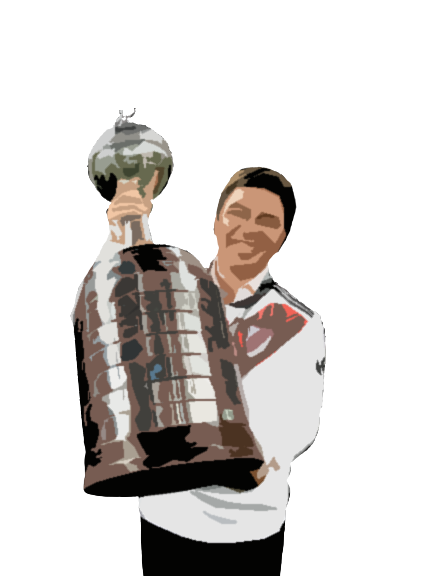

In [242]:
#Imagen para la nube de palabras
respimagen=requests.get("https://github.com/claudiodanielpc/dataviz_varios/raw/main/riverplate/gallardo_c.png")
img=Image.open(BytesIO(respimagen.content))
#Mostrar imagen
img

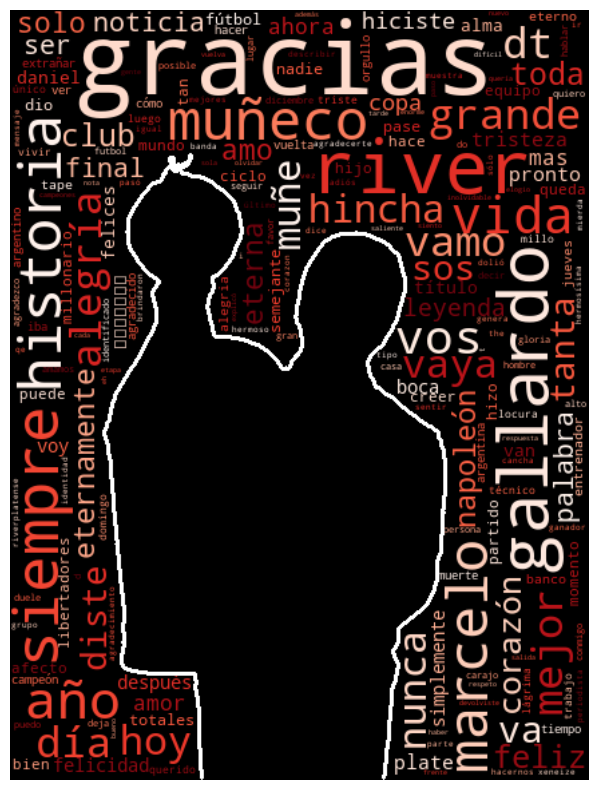

In [243]:
#Crear nube de palabras
mask = np.array(img)
mask[mask > 0] = 255

#Crear wordcloud con variable texto de tweets_df
wordcloud = WordCloud(background_color="black", mask=mask, contour_width=3, contour_color='white',collocations=False, colormap="Reds")
wordcloud.generate(' '.join(tweets_df['text']))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
#Guardar imagen
plt.savefig("gallardoredes.png",bbox_inches='tight',dpi=300)

